# Notebook gestion des données Rhone

### Import des library

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from coordonnee_rhone import groupe_riviere, create_point_distance
from coordonnee_rhone import find_nearest_river, find_nearest_river_distance, find_site, get_nearest_distance
from fontion_API import get_site_data

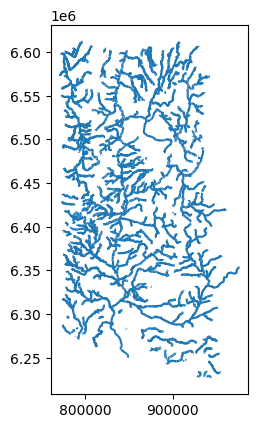

In [3]:
# Charger un fichier GeoJSON
rivers_gdf = gpd.read_file("database/donnee_rhone_affluent.geojson")
if rivers_gdf.crs.to_string() != "EPSG:2154":
    rivers_gdf = rivers_gdf.to_crs(epsg=2154)
rivers_gdf.plot()
plt.show()

### On garde que les affluents importants

In [4]:
rivers_gdf.loc[rivers_gdf['name'] == "L'Aygues", 'name'] = "L'Eygues"
rivers_gdf.loc[rivers_gdf['name'] == "Canal de Miribel", 'name'] = "Le Rhône"
rivers_gdf.loc[rivers_gdf['name'] == "Le Gardon d'Alès", 'name'] = "Le Gardon"
# affluent2 = ["L'Ain", 'La Saône', "L'Isère", "L'Eyrieux", "La Drôme", "L'Ardèche", 'La Cèze', "Le Rhône", "L'Eygues","L'Ouvèze", "La Durance", "Le Gardon"]
affluent = ["L'Ain", 'La Saône', "L'Isère", "L'Ardèche", "Le Rhône", "La Durance"]
# 'Le Rhône - Bras Mort de la Barthelasse', 'Le Petit Rhône', 'Le Rhône - Canal de Beaucaire']
affluent_river = rivers_gdf[rivers_gdf['name'].isin(affluent)]

In [5]:
affluent_river_groupe = groupe_riviere(affluent_river)
point_distance = create_point_distance(affluent_river_groupe, 1)


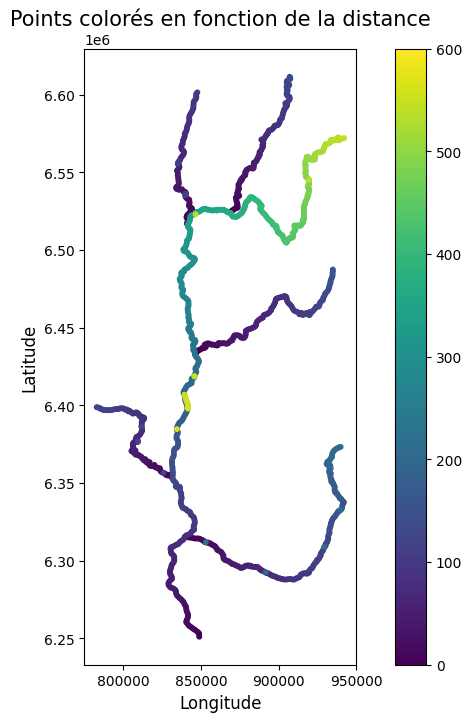

In [6]:
vmin, vmax = 0, 600
# garder que les element entre l'id a et l'id b
# Créer le plot
fig, ax = plt.subplots(figsize=(10, 8))
point_distance.plot(
    column='distance',          # Colonne à utiliser pour la couleur
    cmap='viridis',             # Palette de couleurs (modifiable selon vos préférences)
    legend=True,                # Afficher la légende
    vmin=vmin,                  # Minimum de l'échelle de couleur
    vmax=vmax,                  # Maximum de l'échelle de couleur
    ax=ax,                      # Axe de la figure
    markersize=10               # Taille des points (ajuster si nécessaire)
)
# Ajouter un titre et configurer l'affichage
ax.set_title("Points colorés en fonction de la distance", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Afficher la carte
plt.show()


In [7]:
# Faire un dataframe avec pour chaque riviere son dernier point de point_distance et la riviere la plus proche de ce point
# trier les points par distance
point_distance = point_distance.sort_values('distance')
df_confluence = point_distance.groupby('riviere').first().reset_index()
df_confluence['riviere_proche'] = df_confluence.apply(lambda x: find_nearest_river(x, affluent_river_groupe), axis=1)
df_confluence['distance_rhone']= df_confluence.apply(lambda x: find_nearest_river_distance(x, point_distance), axis=1)
# sauvegarder en csv
df_confluence.to_csv('database/confluence.csv', index=False)
df_confluence


,riviere,distance,geometry,riviere_proche,distance_rhone
0,L'Ain,0.0,POINT (869105.893 6523853.843),Le Rhône,367.0
1,L'Ardèche,0.0,POINT (831594.988 6352954.475),Le Rhône,132.0
2,L'Isère,0.0,POINT (846042.094 6433112.778),Le Rhône,223.0
3,La Durance,0.0,POINT (839539.434 6315272.712),Le Rhône,82.0
4,La Saône,0.0,POINT (841425.89 6515914.598),Le Rhône,332.0
5,Le Rhône,0.0,POINT (848725.84 6253124.718),La Durance,41.0


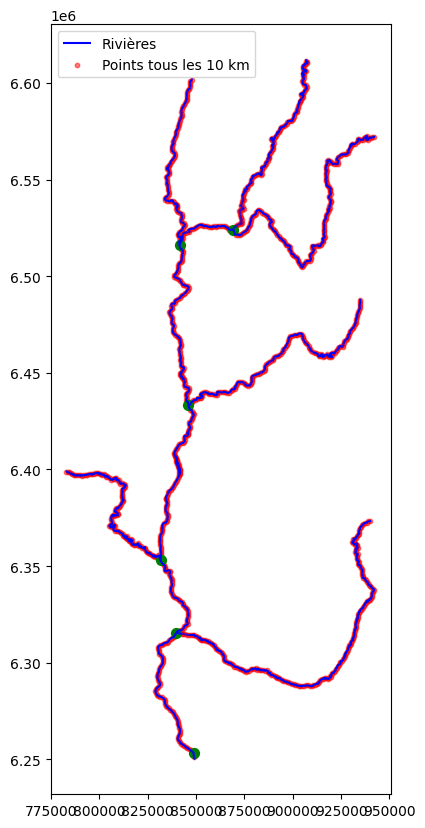

In [8]:
# Tracer les rivières fusionnées et les points
fig, ax = plt.subplots(figsize=(10, 10))
# Tracer les rivières
affluent_river_groupe.plot(ax=ax, color='blue')
# Tracer les points
point_distance.plot(ax=ax, color='red', markersize=10, alpha=0.5)
df_confluence.plot(ax=ax, color='green', markersize=50)
# Ajouter des légendes
plt.legend(["Rivières", "Points tous les 10 km"])
# Afficher le graphique
plt.show()

### Importation de l'API

In [9]:
data_site = get_site_data()
df = pd.DataFrame(data_site['data'])

point_site = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude_site, df.latitude_site), crs="EPSG:4326")
point_site = point_site.to_crs(epsg=2154)

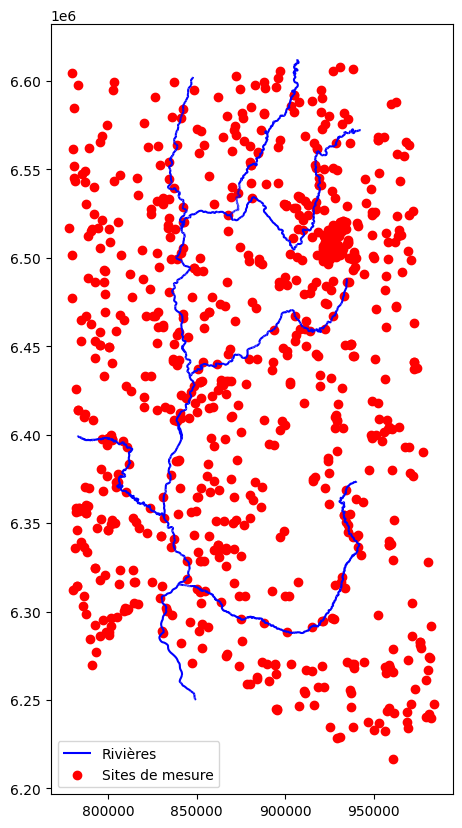

In [10]:
ax = affluent_river_groupe.plot(color='blue', figsize=(10, 10), label='Rivières')
point_site.plot(ax=ax, color='red', label='Sites de mesure')
# ajouter la legende des affluents
plt.legend()
plt.show()

In [11]:
site_filtered = find_site(affluent_river_groupe, point_site)
# liste_code_site = ['U4300010',
#  'U4720020',
#  'V1000010',
#  'V1020020',
#  'V1630020',
#  'V4010010',
#  'V4530010',
#  'V5480001',
#  'V2322010',
#  'V2712010',
#  'V2942010',
#  'V4154010',
#  'V4174021',
#  'V4214010',
#  'V4264010',
#  'V6042010',
#  'V6052010',
#  'V6155621',
#  'V6051010',
#  'V4300001',
#  'V5004030',
#  'V5004020',
#  'V5014030',
#  'V5014010',
#  'V5035022',
#  'V5054010',
#  'V5064010',
#  'V5131010',
#  'V5324010',
#  'V5334010',
#  'V5354010',
#  'V5404025',
#  'V5410004',
#  'V5424010',
#  'V5430002',
#  'V5454010',
#  'V5464015',
#  'V5474010',
#  'V5474015',
#  'V7155010',
#  'V7164010',
#  'V7184015',
#  'V7185018',
#  'V7194010',
#  'W1300010',
#  'W1310010',
#  'W1400001',
#  'W1410010',
#  'W3200010',
#  'X1130001',
#  'X3001013',
#  'X3020010',
#  'X3210201',
#  'X3310010',
#  'X3500010',
#  'V7200010']
liste_code_site_month = ['U4300010',
 'U4720020',
 'V1000010',
 'V1020020',
 'V1264022',
 'V1264024',
 'V1630020',
 'V2712010',
 'V2712012',
 'V2942010',
 'V3000020',
 'V4010010',
 'V5004020',
 'V5004030',
 'V5006210',
 'V5014010',
 'V5014040',
 'V5035022',
 'V5054010',
 'V5064010',
 'V5131010',
 'V5480001',
 'W1300010',
 'W1310010',
 'W1400001',
 'W1410010',
 'W3200010',
 'X3020010',
 'X3210201',
 'X3310010',
 'X3500010',
 'V7200010']
site_filtered = site_filtered[site_filtered['code_site'].isin(liste_code_site_month)]
# enlever les sites qui sont dans la liste
# site_filtered = site_filtered[~site_filtered['code_site'].isin(liste_code_site)]

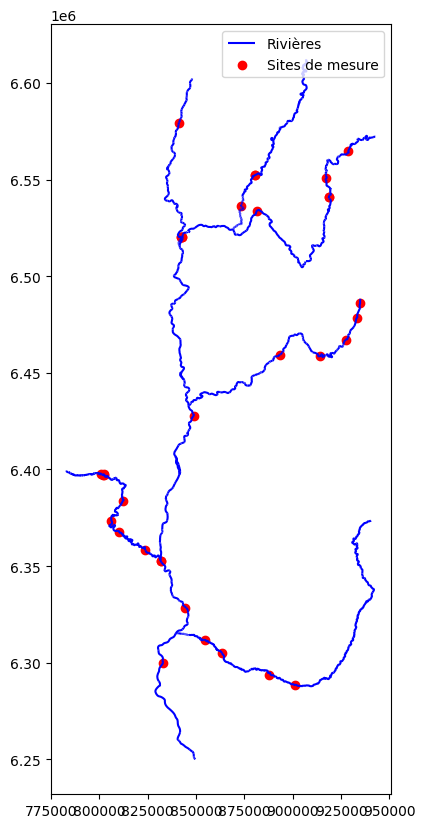

In [12]:
ax = affluent_river_groupe.plot(color='blue', figsize=(10, 10), label='Rivières')
site_filtered.plot(ax=ax, color='red', label='Sites de mesure')
# ajouter la legende des affluents
plt.legend()

In [13]:
site_filtered['distance'] = site_filtered.apply(get_nearest_distance, axis=1, points_distance=point_distance)
# Afficher les résultats avec la nouvelle colonne de distance
df_final = site_filtered[['geometry', 'river_name', 'distance', "code_site"]].reset_index(drop=True).copy()
# enregistrer en csv
df_final.to_csv('database/site_affluent_rhone.csv', index=False)

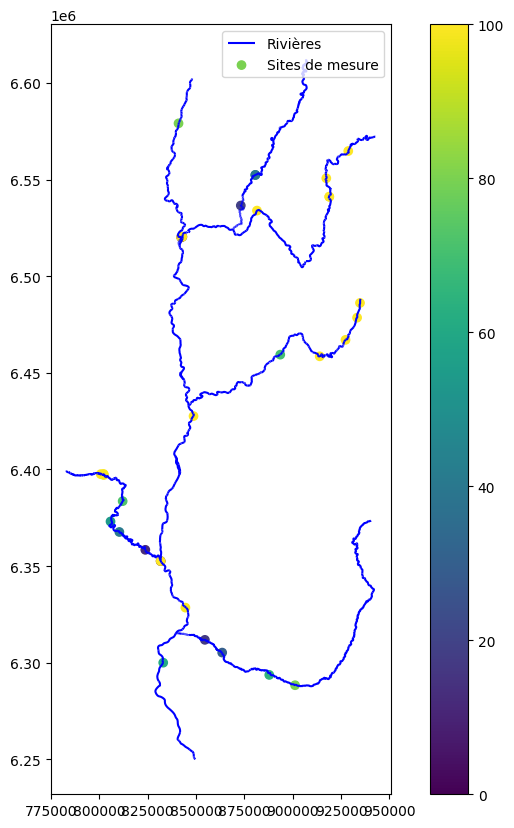

In [14]:
ax = affluent_river_groupe.plot(color='blue', figsize=(10, 10), label='Rivières')
df_final.plot(ax=ax, column="distance", cmap='viridis', legend=True, label='Sites de mesure', vmax=100)
# ajouter la legende des affluents
plt.legend()

In [15]:
affluent_river_groupe

,name,geometry
0,L'Ain,"MULTILINESTRING ((869105.893 6523853.843, 8691..."
1,L'Ardèche,"MULTILINESTRING ((831594.988 6352954.475, 8315..."
2,L'Isère,"MULTILINESTRING ((846042.094 6433112.778, 8461..."
3,La Durance,"MULTILINESTRING ((839539.434 6315272.712, 8399..."
4,La Saône,"MULTILINESTRING ((841425.89 6515914.598, 84136..."
5,Le Rhône,"MULTILINESTRING ((848725.84 6253124.718, 84880..."


In [23]:

# Convertir en GeoJSON
affluent_river_groupes = affluent_river_groupe.to_crs(epsg=4326)
geojson_rivieres = affluent_river_groupes.to_json()

# Sauvegarder dans un fichier pour l'importer dans Observable
with open("database/rivieres.json", "w") as f:
    f.write(geojson_rivieres)


In [12]:
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads

In [14]:
# Convertir en GeoJSON
df_final = pd.read_csv('database/site_affluent_rhone.csv')
# Conversion de la colonne geometry de WKT en objets Point
df_final["geometry"] = df_final["geometry"].apply(loads)

# Création du GeoDataFrame avec un CRS (ex: EPSG:2154 pour la France)
gdf = gpd.GeoDataFrame(df_final, geometry="geometry", crs="EPSG:2154")
df_finals = gdf.to_crs(epsg=4326)
geojson_site = df_finals.to_json()

# Sauvegarder dans un fichier pour l'importer dans Observable
with open("database/site.json", "w") as f:
    f.write(geojson_site)

In [15]:
gdf

,geometry,river_name,distance,code_site,source
0,POINT (840903 6579066.005),La Saône,80.0,U4300010,La Saône_80.0
1,POINT (842260 6520143.005),La Saône,5.0,U4720020,La Saône_5.0
2,POINT (842260 6520143.005),Le Rhône,336.0,U4720020,Le Rhône_336.0
3,POINT (928713 6564753.005),Le Rhône,521.0,V1000010,Le Rhône_521.0
4,POINT (917351.674 6550665.813),Le Rhône,493.0,V1020020,Le Rhône_493.0
5,POINT (918886 6541111.004),Le Rhône,481.0,V1264022,Le Rhône_481.0
6,POINT (918886 6541111.004),Le Rhône,481.0,V1264024,Le Rhône_481.0
7,POINT (881483 6533936.005),Le Rhône,389.0,V1630020,Le Rhône_389.0
8,POINT (880642 6552375.005),L'Ain,41.0,V2712010,L'Ain_41.0
9,POINT (880642 6552375.005),L'Ain,41.0,V2712012,L'Ain_41.0


In [22]:
type(df_final)

geopandas.geodataframe.GeoDataFrame